- __Nombre y cédula del integrante 1 del grupo:__ Julián Alejandro Úsuga Ortiz 1001137545



- __Nombre y cédula del integrante 2 del grupo:__


# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def printfuller(test_res):
    """ null hypothesis is that a unit root is present in a time series sample."""
    print("Prueba de Dickey Fuller")
    print(f"The test statistic: \t {round(test_res[0], 10)}")
    print(f"p-value: \t \t {test_res[1]}")

plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

### Base de Datos:

In [48]:
s1 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
s2 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
s3 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

### <center> Serie de tiempo 1

### Breve exploración de la DB:

In [49]:
s1.shape

(231, 2)

In [50]:
s1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [51]:
s1.head()

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [52]:
s1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


In [53]:
s1.set_index("fecha", inplace=True)
s1

,valor
fecha,
2021-01-01,0.06
2021-01-02,0.05
2021-01-03,0.05
2021-01-04,0.51
2021-01-05,2.03
...,...
2021-08-15,16.90
2021-08-16,17.35
2021-08-17,18.85


Se lee y se carga la base de datos, la base de datos cuenta con 231 datos y 2 variables(fecha, valor) las cuales se proceden a darle el formato adecuado a la serie de tiempo. Los datos van desde el 1 de enero del 2021 hasta el 19 de agosto del 2021. 



1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

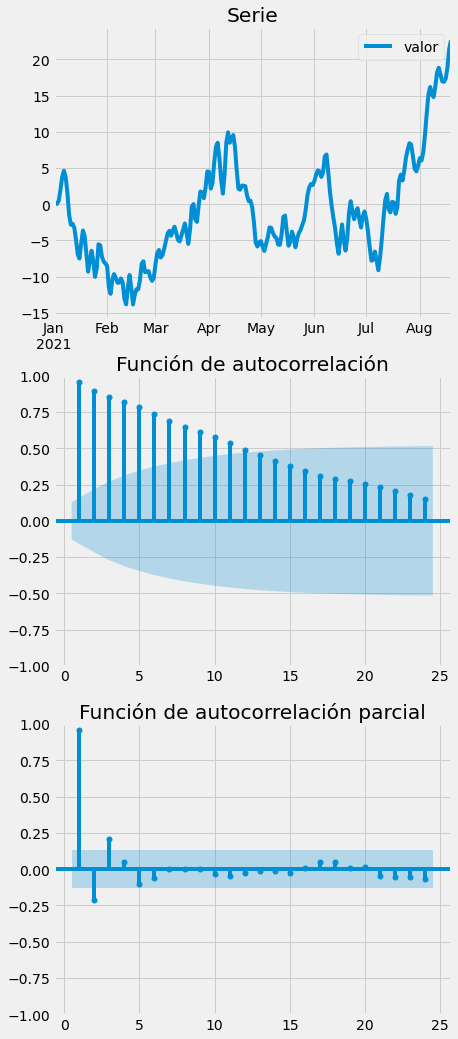

In [54]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Del gráfico de la serie de tiempo no se observa que sea estacionaria, procedemos a observar la función de autocorrelación la cual presenta un decaimiento exponencial lo cual nos da indicios de tener que hacer una diferenciación.

Se realizará una prueba de Dickey-Fuller para verificar si es necesario realizar una diferenciación.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [55]:
test = adfuller(s1)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.6940413117
p-value: 	 	 0.8482869409753933


Observando el p-valor = 0.8482869409753928 y con una significancia de $\alpha = 0.05$ no se rechaza. Esto quiere decir que no hay estacionaridad en la serie, lo que nos indica que debemos realizar una diferenciación. 

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [56]:
s1_aux_dif = s1.diff()
s1_aux_dif

,valor
fecha,
2021-01-01,NaN
2021-01-02,-0.01
2021-01-03,0.00
2021-01-04,0.46
2021-01-05,1.52
...,...
2021-08-15,-0.06
2021-08-16,0.45
2021-08-17,1.50


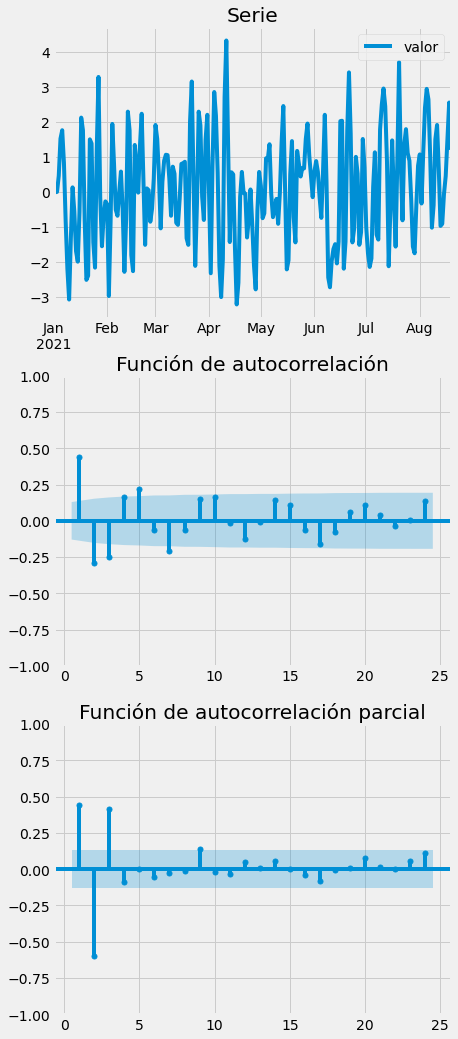

In [57]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1_aux_dif.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()



Despues de hacer una diferenciación y observando la serie diferenciada se obtiene estacionaridad alrededor de 0. Se realizara una prueba Dickey-Fuller para verificar si es necesario realizar otra diferencia. 

In [58]:
test = adfuller(s1_aux_dif.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -6.9049727761
p-value: 	 	 1.2540124522200221e-09


Observando el p-valor $ = 1.25 * 10^{-9} <  \alpha = 0.05 $  se rechaza. Esto quiere decir que hay estacionaridad en la serie. 

No es muy claro de forma grafica que modelo usar. Pero en busca del mejor modelo posible se tiene los siguientes factores en cuenta: 

La **ACF** no presenta el decaimiento exponencial luego de ser diferenciada, en cambio se puede observar un onda sinusoidal amortiguada. En la **PACF** pareciera tener un corte en lag 2, por lo que se plantea un ARIMA(2, 1, 0) el cual sera comparado con diversos modelos. 

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.


Se plantean los siguientes modelos, si a ojo del observador ocurre los siquiente:
* modelo 1 = ARIMA(2, 1, 0) si la ACF tiene un comportamiento sinusoidal, la PACF tiene un corte en el lag 2, y 1 diferencia. 

* modelo 2 = ARIMA(0, 1, 5) si la ACF tiene un corte en el lag 5, la PACF tiene un comportamiento sinusoidal, y 1 diferencia. 

* modelo 3 = ARIMA(2, 1, 5) si la ACF tiene un corte en el lag 5, la PACF tiene un corte en el lag 2, y 1 diferencia. 

* modelo 4 = ARIMA(3, 1, 0) si la ACF tiene un comportamiento sinusoidal, la PACF tiene un corte en el lag 3, y 1 diferencia. 

In [59]:
model1 = ARIMA(s1.valor, order=(2, 1, 0)).fit()
model2 = ARIMA(s1.valor, order=(0, 1, 5)).fit()
model3 = ARIMA(s1.valor, order=(2, 1, 5)).fit()
model4 = ARIMA(s1.valor, order=(3, 1, 0)).fit()


In [60]:
print("AIC")
print(model1.aic, model2.aic, model3.aic, model4.aic)
print("BIC")
print(model1.bic, model2.bic, model3.bic, model4.bic)

AIC
699.6077275167227 666.8536978825089 662.4155801093752 657.723043181799
BIC
709.9219654434922 687.482173736048 689.9202145807608 671.4753604174917


De los 4 modelos planteados se toma el modelo 4 como el mejor modelo de los 4 comparados por el criterio de menor **AIC** y **BIC** 

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [61]:
model4.arroots

array([0.24816548-1.18791376j, 0.24816548+1.18791376j,
       1.6294363 -0.j        ])

In [62]:
ar_p = [1, *-model4.arparams] # modelo.arparams devuelve los parametros del modelo desde el lag 1 hasta el ultimo lag
ar_p.reverse()
abs(np.roots(ar_p))

array([1.6294363, 1.2135589, 1.2135589])

Como las raices son mayores a 1, el modelo obtenido es estacionario.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [63]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Tue, 04 Oct 2022   AIC                            657.723
Time:                        13:06:50   BIC                            671.475
Sample:                    01-01-2021   HQIC                           663.270
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

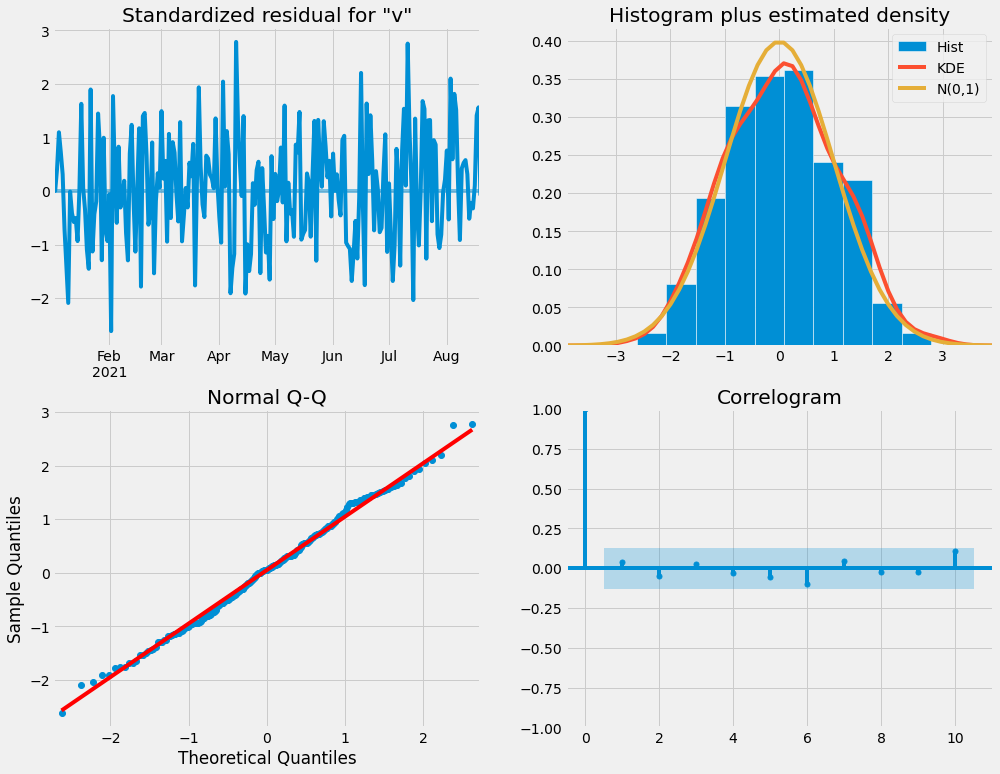

In [64]:
model4.plot_diagnostics(figsize=(15,12))
plt.show()

In [65]:
sm.stats.acorr_ljungbox(model4.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.339442,0.560151
2,0.911694,0.633911
3,1.057063,0.787448
4,1.302026,0.861032
5,2.016187,0.846901
6,4.308090,0.635060
7,4.822493,0.681615
8,4.949330,0.762978
9,5.082445,0.827063
10,7.828782,0.645557


Observando el correlograma no se percibe autocorrelación en los residuales. Y Como se puede ver en la tabla anterior el test no rechaza la hipótesis nula en ningún lag desde 1 hasta 10, ya que todos los p-valores son bastante altos y mayores a un nivel de significancia del 0.05, por lo que se puede decir que la correlación entre los errores ($Corr[e_t, e_{t-h}]$) desde h = 1 hasta 10 es 0.


7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

Observando el qqplot del grafico del literal 6 y dado que la mayoría de datos siguen la tendencia lineal de manera gráfica pareciera cumplir normalidad para ello verificaremos con una prueba de Jarque Bera.

In [66]:
from scipy import stats
stats.jarque_bera(model4.resid)

Jarque_beraResult(statistic=1.5204363350845262, pvalue=0.4675644085038976)

Con un p-valor = pvalue=0.4675645241738078 > $ \alpha = 0.05 $ no se rechaza la hipotesis de normalidad. Lo que nos indica que se cumple el supuesto de normalidad. 

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [67]:
fore = model3.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower valor,upper valor
2021-08-20,20.132862,23.984791
2021-08-21,17.286415,25.897809
2021-08-22,16.288035,27.903717
2021-08-23,16.093119,29.258258
2021-08-24,15.281614,29.815298


In [68]:
fore.predicted_mean

2021-08-20    22.058827
2021-08-21    21.592112
2021-08-22    22.095876
2021-08-23    22.675688
2021-08-24    22.548456
Freq: D, Name: predicted_mean, dtype: float64

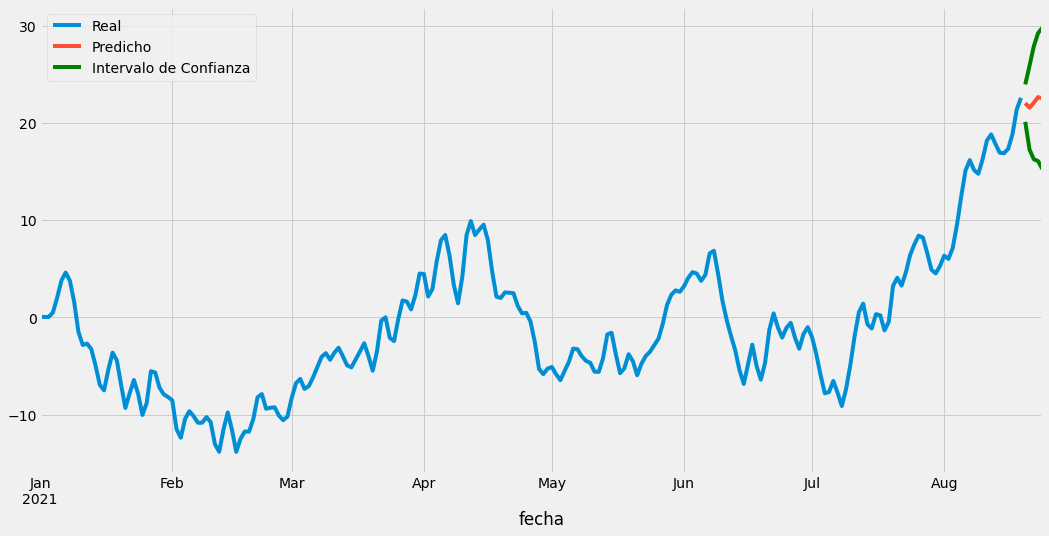

In [69]:
plt.figure(figsize=(16,8))  #  Graficamos:
s1.valor.plot()
fore.predicted_mean.plot()
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

### <center> Serie de tiempo 3

### Breve exploración de la DB:

In [70]:
s3.shape

(837, 2)

In [71]:
s3.dtypes

dia         datetime64[ns]
registro           float64
dtype: object

In [72]:
s3.head()

,dia,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67


In [73]:
s3.tail()

,dia,registro
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94
836,2019-08-19,42.46


In [74]:
s3.set_index("dia", inplace=True)
s3

,registro
dia,
2020-03-07,-54.21
2019-07-24,26.12
2020-07-10,-16.74
2019-06-19,-1.54
2019-04-01,-1.67
...,...
2019-02-17,0.35
2019-04-17,-13.90
2021-04-14,-52.95


In [75]:
s3.sort_values(by='dia', inplace = True)
s3

,registro
dia,
2019-01-01,1.37
2019-01-02,3.65
2019-01-03,5.86
2019-01-04,10.57
2019-01-05,14.17
...,...
2021-04-12,-59.77
2021-04-13,-56.04
2021-04-14,-52.95


Se observa que la base de datos tiene 837 filas.

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

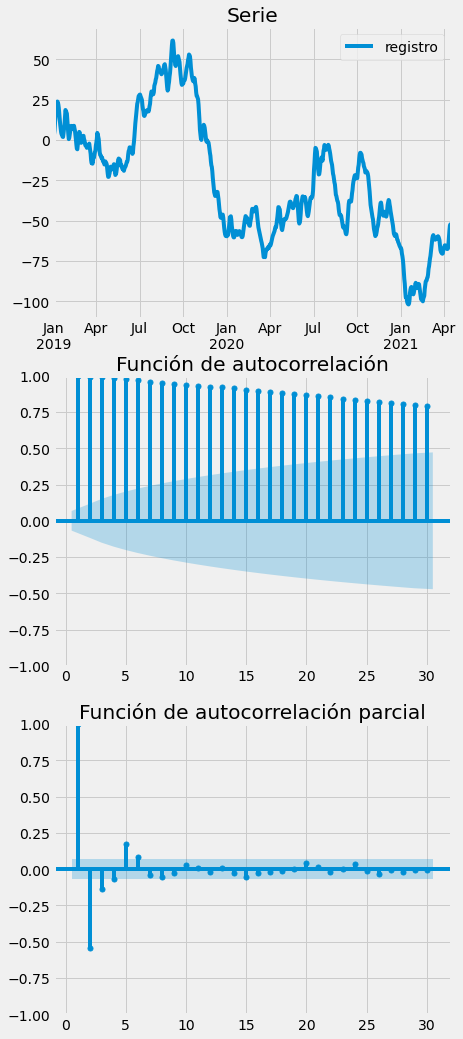

In [94]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s3, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


Se realiza la prueba de Dickey-Fuller y se observa que no hay estacionariedad, por lo que es necesario realizar una diferencia.

In [77]:
test = adfuller(s3.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -1.5245498355
p-value: 	 	 0.5213338273526235


3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [78]:
s3_aux_dif = s3.diff()
s3_aux_dif

,registro
dia,
2019-01-01,NaN
2019-01-02,2.28
2019-01-03,2.21
2019-01-04,4.71
2019-01-05,3.60
...,...
2021-04-12,4.27
2021-04-13,3.73
2021-04-14,3.09


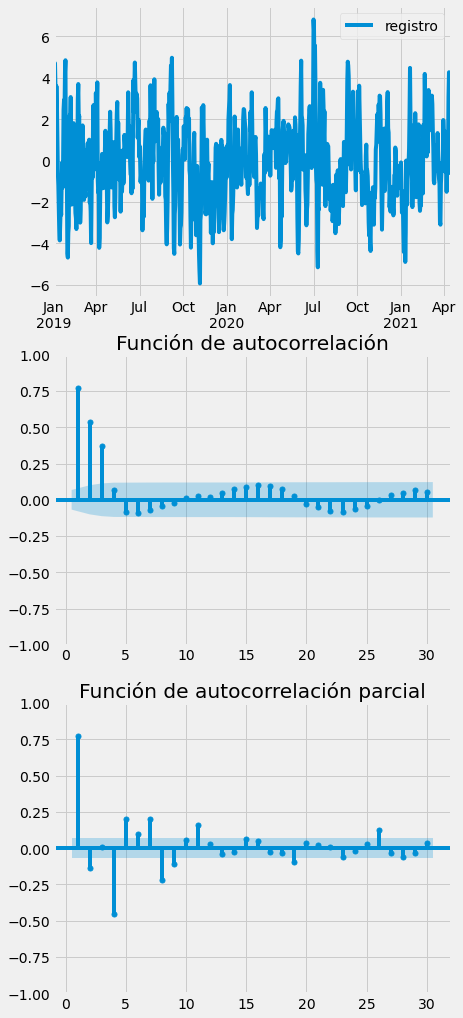

In [79]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3_aux_dif.plot(ax=ax[0], xlabel = "")
plot_acf(s3_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

In [95]:
test = adfuller(s3_aux_dif.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -6.0876204756
p-value: 	 	 1.0550731533337754e-07


Se observa que la ACF cae mas rapidamente, una señal de que ya puede haber estacionariedad. Se realiza nuevamente la prueba de Dickey-Fuller y se obtiene un p-valor demasiado pequeño, se concluye que el problema de estacionariedad se resulve realizando una diferencia.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.m

Se van a entrenar 7 modelos basados en las graficas de la ACF y PACF y de la diferenciación necesaria para que la serie fuera estacionaria.

In [189]:
pdq_l = [(p, 1, q) for p in [1, 2, 4, 5, 7, 8, 11, 15] for q in [0, 1]]

In [190]:
filas = []
for order in pdq_l:
    fit = ARIMA(s3, order=order).fit()
    aic = fit.aic
    bic = fit.bic
    filas.append([order, aic, bic])

In [192]:
pd.DataFrame(filas, columns=["order", "aic", "bic"]).sort_values(["aic"])

,order,aic,bic
12,"(11, 1, 0)",2421.644875,2478.388418
14,"(15, 1, 0)",2421.893221,2497.551279
15,"(15, 1, 1)",2422.752352,2503.139038
13,"(11, 1, 1)",2423.119821,2484.591993
11,"(8, 1, 1)",2449.724787,2497.011073
10,"(8, 1, 0)",2453.410873,2495.968530
9,"(7, 1, 1)",2477.717957,2520.275614
8,"(7, 1, 0)",2495.317875,2533.146904
7,"(5, 1, 1)",2534.941578,2568.041979
6,"(5, 1, 0)",2535.291886,2563.663657


De la tabla anterior obtuvimos que el mejor modelo es el ARIMA(8, 1, 0) (el ARIMA(11, 1, 0) presentaba problemas de normalidad).

In [193]:
m = ARIMA(s3, order=(11, 1, 0)).fit()

In [194]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                ARIMA(11, 1, 0)   Log Likelihood               -1198.822
Date:                Tue, 04 Oct 2022   AIC                           2421.645
Time:                        13:55:16   BIC                           2478.388
Sample:                    01-01-2019   HQIC                          2443.398
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9546      0.037     25.546      0.000       0.881       1.028
ar.L2         -0.1966      0.050     -3.898      0.000      -0.295      -0.098
ar.L3          0.5530      0.046     11.923      0.000       0.462       0.644
ar.L4         -0.8828      0.051    -17.178      0.000      -0.983      -0.782
ar.L5          0.1821      0.060      3.044      0.002       0.065       0.299
ar.L6         -0.0767      0.059     -1.294      0.196      -0.193       0.039
ar.L7          0.4974      0.058      8.634      0.000       0.384       0.610
ar.L8         -0.1951      0.051     -3.823      0.000      -0.295      -0.095
ar.L9         -0.1283      0.048     -2.683      0.007      -0.222      -0.035
ar.L10        -0.1093      0.048     -2.262      0.024      -0.204      -0.015
ar.L11         0.1710      0.034      5.033      0.000       0.104       0.238
sigma2         1.0264      0.047     21.741      0.000       0.934       1.119
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.03
Prob(Q):                              0.86   Prob(JB):                         0.03
Heteroskedasticity (H):               0.88   Skew:                             0.14
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como podemos ver el modelo no tiene problemas de normalidad (no se rechaza normalidad en los residuos con el test de Kolmogorov-Smirnov cuando se compara con la CDF de una normal, esto se puede corroborar viendo el QQPlot)

In [197]:
stats.kstest(m.resid, stats.norm.cdf)

KstestResult(statistic=0.020720068914133027, pvalue=0.8574745394866656)

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [202]:
abs(m.arroots) # raices del modelo AR para 

array([1.31190872, 1.31190872, 1.18474565, 1.18474565, 1.11446203,
       1.11446203, 1.1262917 , 1.1262917 , 1.14575235, 1.14575235,
       1.17063913])

Se obtienen las raices para la parte autorregresiva y no se obtiene ninguna raiz adentro del circulo unitario, lo que es bueno ya que podemos afirmar que el proceso del modelo obtenido es estacionario. 

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [198]:
sm.stats.acorr_ljungbox(m.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.000691,0.979031
2,0.168601,0.919155
3,0.326528,0.954964
4,0.404617,0.982097
5,1.173453,0.947399
6,1.230225,0.975366
7,1.946728,0.962730
8,2.831018,0.944510
9,3.998224,0.911529
10,5.756400,0.835297


Como podemos ver no se rechaza la hipotesis de residuos no correlacionados, incluso se puede observar que los p-valores toman valores muy grandes, hay una fuerte evidencia para afirmar la no correlación.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

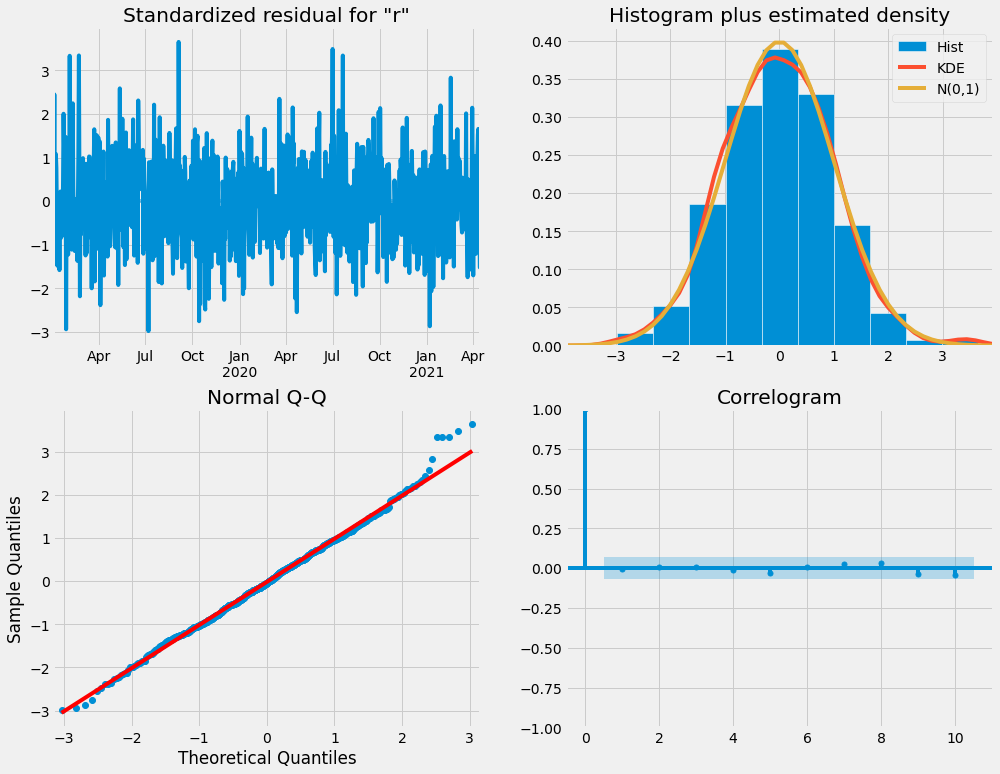

In [204]:
m.plot_diagnostics(figsize=(15,12))
plt.show()

En los graficos anteriores se puede ver que:
- Los errores tienen media 0
- La densidad de los errores se acerca mucho a una Normal(0, 1)
- El QQPlot evidencia graficamente normalidad de los errores
- El correlograma evidencia la poca correlación que se obtuvo igualmente con el test Ljung-Box

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [206]:
# primera forma
fore = m.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower registro,upper registro
2021-04-17,-56.421978,-52.450613
2021-04-18,-60.837255,-52.117956
2021-04-19,-64.248315,-50.522664
2021-04-20,-67.638290,-47.482463
2021-04-21,-70.708040,-44.491975


In [207]:
fore.predicted_mean

2021-04-17   -54.436296
2021-04-18   -56.477605
2021-04-19   -57.385490
2021-04-20   -57.560377
2021-04-21   -57.600008
Freq: D, Name: predicted_mean, dtype: float64

In [210]:
pred = m.get_prediction(start=len(s3), end=len(s3)+5, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower registro,upper registro
2021-04-17,-56.421978,-52.450613
2021-04-18,-60.837255,-52.117956
2021-04-19,-64.248315,-50.522664
2021-04-20,-67.638290,-47.482463
2021-04-21,-70.708040,-44.491975
2021-04-22,-72.789642,-41.650176


In [211]:
pred.predicted_mean

2021-04-17   -54.436296
2021-04-18   -56.477605
2021-04-19   -57.385490
2021-04-20   -57.560377
2021-04-21   -57.600008
2021-04-22   -57.219909
Freq: D, Name: predicted_mean, dtype: float64

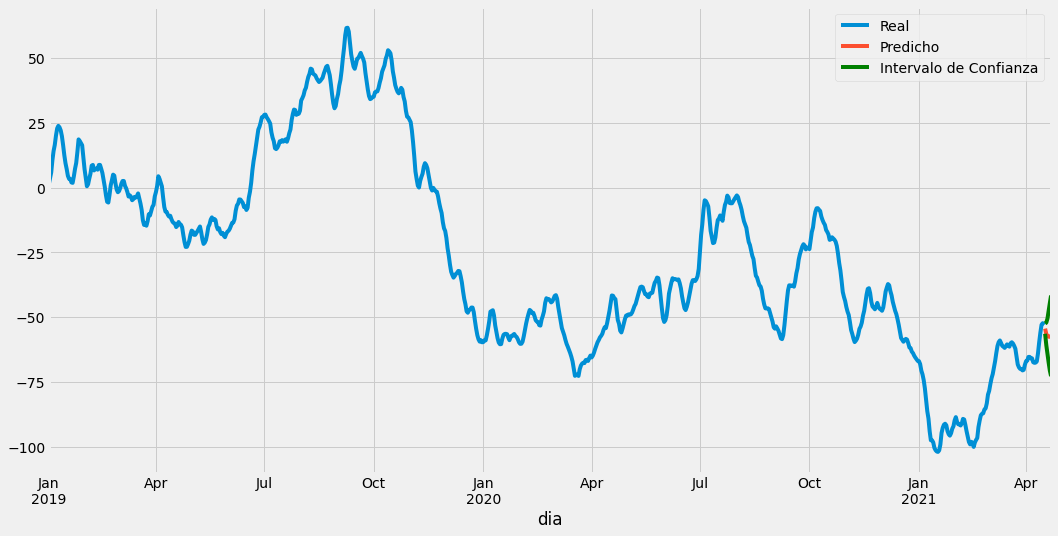

In [212]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3.registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

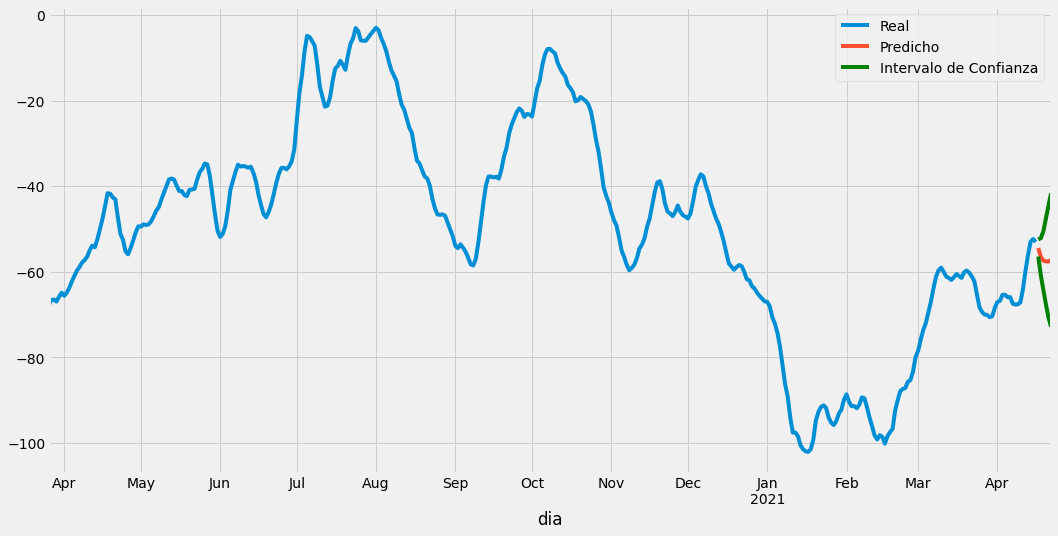

In [219]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3[450:].registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])